In [ ]:
#voir 2e code en bas pour le "un peu plus fonctionnel"

In [1]:
import argparse
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import math
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
dataset = !unzip '/content/gdrive/My Drive/RektNet_Dataset.zip'

In [3]:
feature_detector = cv2.FastFeatureDetector_create(threshold=25,nonmaxSuppression=True)
lk_params = dict(winSize=(21, 21),criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 30, 0.03))
current_pos = np.zeros((3, 1))
current_rot = np.eye(3)

In [4]:
# create graph.
# position_figure = plt.figure()
# position_axes = position_figure.add_subplot(1, 1, 1)
# error_figure = plt.figure()
# rotation_error_axes = error_figure.add_subplot(1, 1, 1)
# rotation_error_list = []
# frame_index_list = []
# position_axes.set_aspect('equal', adjustable='box')

In [5]:
prev_image = None
valid_ground_truth = False


camera_matrix = np.array([[718.8560, 0.0, 607.1928],[0.0, 718.8560, 185.2157],[0.0, 0.0, 1.0]])

In [7]:
image1 = cv2.imread("/content/conebleu.jpg")

prev_image = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    
# main process
keypoint = feature_detector.detect(prev_image, None)

prev_keypoint = keypoint
    

In [8]:
img1 = cv2.drawKeypoints(prev_image, prev_keypoint, None)
#cv2_imshow(img1)

In [9]:
points = np.array(list(map(lambda x: [x.pt], prev_keypoint)),dtype=np.float32)

In [10]:
image2 = cv2.imread("/content/conejaune.jpg")

image = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

In [11]:
p1, st, err = cv2.calcOpticalFlowPyrLK(prev_image,image, points,None, **lk_params)
E, mask = cv2.findEssentialMat(p1, points, camera_matrix,cv2.RANSAC, 0.999, 1.0, None)
points, R, t, mask = cv2.recoverPose(E, p1, points, camera_matrix)
scale = 1.0


In [13]:
#position_axes.scatter(current_pos[0][0], current_pos[2][0])

In [14]:
img = cv2.drawKeypoints(image, keypoint, None)

In [15]:
#cv2_imshow(img)

In [ ]:
#autre code 

In [16]:
import numpy as np
import skimage 
import cv2
import matplotlib.pyplot as plt 

In [17]:
def plot(image):
    plt.imshow(image)
    plt.show()

In [18]:
def plot_keypoints(image, kp):
    plt.figure(figsize= [10,10])
    plt.imshow(image)
    plt.scatter(kp[:,1], kp[:,0], marker= "*", color = "b", s = 100)
    plt.show()

In [19]:
# left_image, right_image,_ = skimage.data.stereo_motorcycle()
# print(left_image.shape, right_image.shape)
left_image = cv2.imread("/content/conessfond.png")
right_image = cv2.imread("/content/conebleu.jpg")
print(left_image.shape, right_image.shape)

(1560, 1170, 3) (1560, 1170, 3)


In [66]:
#cv2_imshow(left_image)

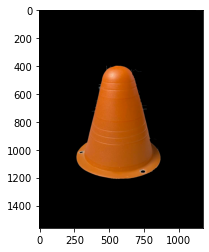

In [20]:
plt.imshow(left_image)

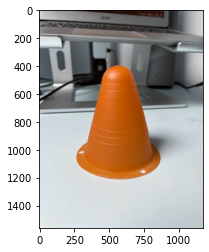

In [21]:
plt.imshow(right_image)

In [22]:
from skimage.feature import ORB, match_descriptors

keypoints = 10 

orb1 = ORB(n_keypoints= keypoints)
orb2 = ORB(n_keypoints= keypoints)

orb1.detect(left_image[:,:,0])
orb2.detect(right_image[:,:,0])


orb1.extract(left_image[:,:,0], orb1.keypoints, orb1.scales, orb1.orientations)
orb2.extract(right_image[:,:,0], orb2.keypoints,  orb2.scales, orb2.orientations)

# above 2 can be done in one 1 line
# orb1.detect_and_extract()

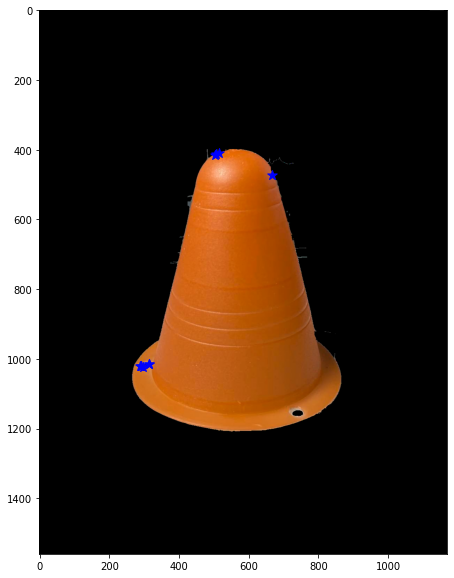

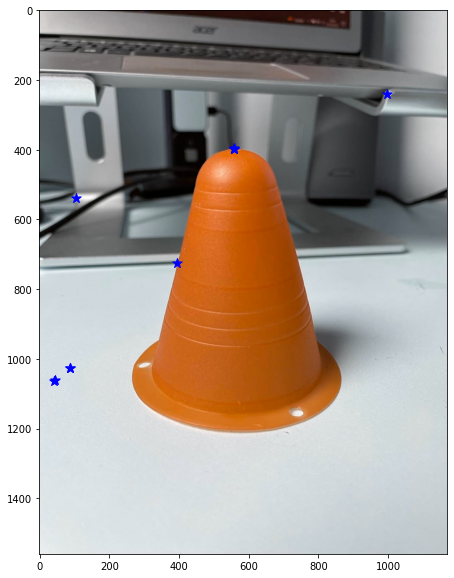

In [23]:
plot_keypoints(left_image, orb1.keypoints)
plot_keypoints(right_image, orb2.keypoints)